### Ex 2A : Association Rule Mining - Apriori Algorithm

Question :
* Download a market basket analysis dataset from Kaggle and implement Apriori and FP-Growth algorithms to generate strong association rules.
* Assume minimum support count = 3 and minimum confidence = 60%

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv("Grocery.csv", usecols=["Items"])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: ignored

In [ ]:
df.shape

(21, 1)

In [ ]:
df.Items = df.Items.apply(lambda x : str(x).split(","))

In [ ]:
transactions = list(df.Items)
transactions[:5]

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT']]

In [ ]:
df_exploded = df.explode("Items")
dummies = pd.get_dummies(df_exploded, columns=["Items"])

In [ ]:
basket = dummies.groupby(dummies.index).sum()
basket.reset_index(drop=True, inplace=True)

In [ ]:
basket.columns = [col.replace('Items_', '') for col in basket.columns]

In [ ]:
display(basket.head())

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
frequent_itemsets = apriori(basket, min_support = 3/len(basket), use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
display(rules.head())
print(f"Rules Count : {len(rules)}")

/Users/anand/miniconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(CORNFLAKES),0.333333,0.285714,0.142857,0.428571,1.500000,0.047619,1.250000,0.500000
1,(CORNFLAKES),(BISCUIT),0.285714,0.333333,0.142857,0.500000,1.500000,0.047619,1.333333,0.466667
2,(TEA),(BOURNVITA),0.380952,0.238095,0.142857,0.375000,1.575000,0.052154,1.219048,0.589744
3,(BOURNVITA),(TEA),0.238095,0.380952,0.142857,0.600000,1.575000,0.052154,1.547619,0.479167
4,(COCK),(COFFEE),0.142857,0.428571,0.142857,1.000000,2.333333,0.081633,inf,0.666667


Rules Count : 18


In [ ]:
transactions[:5]

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT']]

In [1]:
from itertools import chain, combinations

def generate_itemsets(itemsets, k) :
  return set([i.union(j) for i in itemsets for j in itemsets if len(i.union(j)) == k])
def prune_itemset(itemset, transactions, min_support=0.2) :
  count = {}
  for transaction in transactions :
    for candidate in itemset :
      if candidate.issubset(transaction) :
        count[candidate] = count.get(candidate, 0) + 1
  num_items = float(len(transactions))
  return {item : support/num_items for item, support in count.items() if (support/num_items) >= min_support}

def apriori(transactions, min_support=0.2) :
  itemset = set(frozenset([item]) for item in set(chain(*transactions)))
  itemset = prune_itemset(itemset, transactions, min_support)
  all_frequent_items = [itemset]

  k = 2
  while True :
    candidates = generate_itemsets(itemset, k)
    candidates = prune_itemset(candidates, transactions, min_support)
    if not candidates :
      break
    all_frequent_items.append(candidates)
    itemset = candidates
    k += 1
  return all_frequent_items

min_support = 3/len(transactions)
frequent_itemsets = apriori(transactions, min_support)

NameError: ignored

In [ ]:
frequent_items = list()
for itemsets in frequent_itemsets :
  for item, support in itemsets.items() :
      frequent_items.append({"Itemset" : item, "Support" : support})

frequent_itemsets = pd.DataFrame(frequent_items)
display(frequent_itemsets)

,Itemset,Support
0,(MILK),0.238095
1,(BREAD),0.666667
2,(BISCUIT),0.333333
3,(CORNFLAKES),0.285714
4,(BOURNVITA),0.238095
5,(TEA),0.380952
6,(MAGGI),0.238095
7,(COCK),0.142857
8,(COFFEE),0.428571
9,(SUGER),0.285714


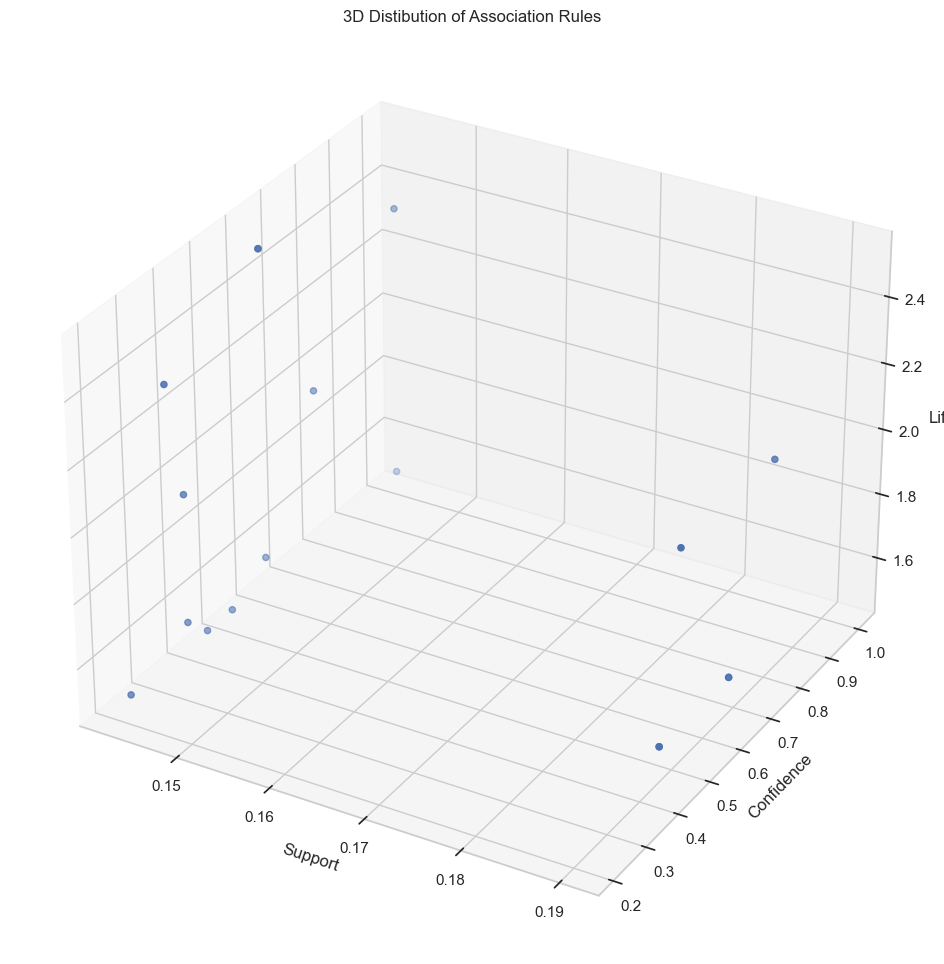

In [ ]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
x = rules['support']
y = rules['confidence']
z = rules['lift']
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.scatter(x,y,z)
ax.set_title('3D Distibution of Association Rules')
plt.show()
#Note : Rules at top right are more meaningful